<a href="https://colab.research.google.com/github/swarnadharshini/ML-Projects/blob/main/CNN_using_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Implementing a Deep Learning Model using CIFAR-10 dataset.***


In [43]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

LOADING DATASET

In [44]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

NORMALIZING IMAGES

In [ ]:
X_train = X_train/255.0
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_test = X_test/255.0
X_test.shape

(10000, 32, 32, 3)

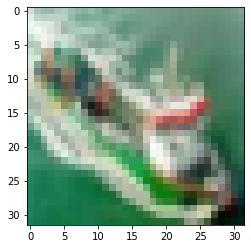

In [ ]:
plt.imshow(X_test[15])

Building a Convolutional Neural Network

In [ ]:
cifar10_model=tf.keras.models.Sequential()

In [ ]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [ ]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [ ]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [ ]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [ ]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [ ]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_2 (Dropout)         (None, 8192)              0         
                                                      

Compiling the Model

In [45]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

Training the Model

In [46]:
cifar10_model.fit(X_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 140s 89ms/step - loss: 2.3485 - sparse_categorical_accuracy: 0.3197
Epoch 2/15
1563/1563 [==============================] - 137s 87ms/step - loss: 1.4373 - sparse_categorical_accuracy: 0.4856
Epoch 3/15
1563/1563 [==============================] - 136s 87ms/step - loss: 1.2660 - sparse_categorical_accuracy: 0.5534
Epoch 4/15
1563/1563 [==============================] - 141s 90ms/step - loss: 1.1523 - sparse_categorical_accuracy: 0.5967
Epoch 5/15
1563/1563 [==============================] - 139s 89ms/step - loss: 1.0881 - sparse_categorical_accuracy: 0.6171
Epoch 6/15
1563/1563 [==============================] - 138s 88ms/step - loss: 1.0321 - sparse_categorical_accuracy: 0.6403
Epoch 7/15
1563/1563 [==============================] - 138s 88ms/step - loss: 0.9753 - sparse_categorical_accuracy: 0.6573
Epoch 8/15
1563/1563 [==============================] - 140s 90ms/step - loss: 0.9333 - sparse_categorical_accuracy: 0.6756
Epoch 9/

In [48]:
test_loss, test_accuracy = cifar10_model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.0475 - sparse_categorical_accuracy: 0.6462


In [49]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6462000012397766
